In [19]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from utils import read_data
import seaborn as sns
import pandas as pd

In [20]:
modelName = "m16"
# modelName = "p16"
mode = "TRAIN"

In [21]:
if mode == "TRAIN":
    sourceFolder = "o7_analyze_train"
elif mode == "TEST":
    sourceFolder = "o7_analyze_test"
else:
    raise ValueError("Unknown mode")
sourceFolder = os.path.join(sourceFolder, modelName)

In [22]:
cwd = sys.path[0]
outputFolderPath = os.path.join(cwd, sourceFolder)
folderNames = os.listdir(outputFolderPath)

data = {}
for folderName in folderNames:
    folderPath = os.path.join(outputFolderPath, folderName)
    data_pickle, data_json = read_data(folderPath)

    # X_pred = data_pickle["X_pred"]
    # X_true = data_pickle["X_true"]
    # tArrayPred = data_pickle["tArrayPred"]
    # mseArray = data_pickle["mseArray"]
    # dx = data_json["s2"]["dx"]
    # L = data_json["s2"]["L"]

    valueArray = np.array(data_pickle["feArrayTrue"]) - np.array(data_pickle["feArrayPred"])
    valueArray = np.abs(valueArray)
    data[folderName] = valueArray

tArrayPred = data_pickle["tArrayPred"]
df = pd.DataFrame(data=data, index=tArrayPred)

In [23]:
dft = df.copy()
dft["time"] = dft.index

value_vars = [col for col in dft.columns.values if col != "time"]
dfLong = pd.melt(dft, id_vars=["time"], value_vars=value_vars, var_name="folder", value_name="mse")
dfLong

,time,folder,mse
0,0.0,2024-01-05-10-08-44,0.000000
1,4.0,2024-01-05-10-08-44,0.016200
2,8.0,2024-01-05-10-08-44,0.003757
3,12.0,2024-01-05-10-08-44,0.006065
4,16.0,2024-01-05-10-08-44,0.009738
...,...,...,...
4015,784.0,2024-01-05-10-08-46,0.003023
4016,788.0,2024-01-05-10-08-46,0.003005
4017,792.0,2024-01-05-10-08-46,0.002985
4018,796.0,2024-01-05-10-08-46,0.002960


In [24]:
# df.iloc[-1,:].describe()
dfWide = df.copy()
dfWide["mean"] = dfWide.apply(lambda row: row.describe()["mean"], axis=1)
dfWide["std"] = dfWide.apply(lambda row: row.describe()["std"], axis=1)
dfWide["25%"] = dfWide.apply(lambda row: row.describe()["25%"], axis=1)
dfWide["75%"] = dfWide.apply(lambda row: row.describe()["75%"], axis=1)
dfWide["median"] = dfWide.apply(lambda row: row.median(), axis=1)


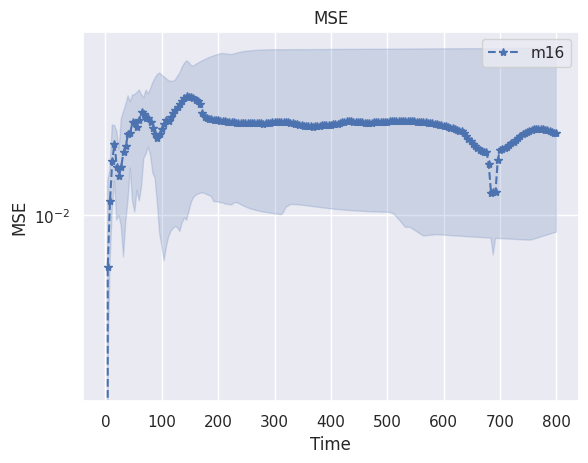

In [25]:
sns.set_theme()

fig, ax = plt.subplots()

xp = dfWide.index.values
yp = dfWide['median'].values
errU = dfWide['75%']
errL = dfWide['25%']

ax.plot(xp, yp, "--*", label=modelName)
ax.fill_between(xp, errU, errL, color='b', alpha=0.2)
ax.set_title(r"MSE")
ax.set_xlabel("Time")
ax.set_ylabel("MSE")
ax.set_yscale('log')
plt.legend()

In [26]:
numBar = 10
idxList = np.linspace(0, tArrayPred.shape[0]-1, numBar ).astype(int)
tList = tArrayPred[idxList]

In [27]:
filt = dfLong["time"].isin(tList)


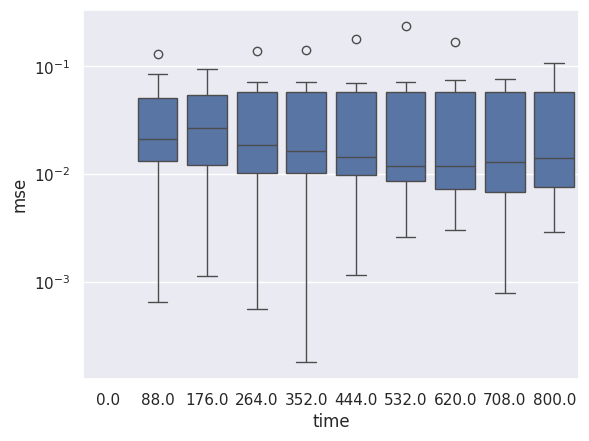

In [28]:
numBar = 10
idxList = np.linspace(0, tArrayPred.shape[0]-1, numBar ).astype(int)
tList = tArrayPred[idxList]
filt = dfLong["time"].isin(tList)
ax = sns.boxplot(data=dfLong[filt], x="time", y="mse")
ax.set_yscale('log')